<a href="https://colab.research.google.com/github/BKousha/FloorPlanSegmentation/blob/main/Check_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Mounted at /content/drive
'Colab Notebooks'
'Copy of Predictive Maintenance Checklist.gdoc'
 FloorPlan_samples
 model_best_val_loss_var.pkl
 Processed_Floor_Plans
 ShotBot
'SNN_soft shadow network for image compositing.pdf'
 test.txt


In [65]:
!pip install mplcursors


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21054 sha256=2df794864baf64c5222c0f6d4c0fefae32ffc9e05f154938a1cef3c17d9608eb
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [66]:
from tqdm import tqdm
import mplcursors

import cv2
import numpy as np
import glob as glob
import os as os
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib as mlp
plt.interactive(True)


In [11]:
mask_folder = '/content/drive/MyDrive/Processed_Floor_Plans/FP_processed/'

In [12]:

labels = ['background',
          'room',
          'hallway',
          'kitchen',
          'columns',
          'mep',
          'windows',
          'doors',
          'glass_doors',
          'bathrooms',
          'elevators',
          'stairs',
          'storage',
          'elevator_doors'
          ]
category_colors  = ['white',      #background        0
                    'red',        #room              1
                    'lawngreen',  #hallway           2
                    'peru',       #kitchen           3
                    'yellow',     #columns           4
                    'saddlebrown',#mep               5
                    'deepskyblue',#windows           6
                    'blue',       #doors             7
                    'purple',     #glass_doors       8
                    'sienna',     #bathrooms         9
                    'peachpuff',  #elevators         10
                    'gray',       #stairs            11
                    'peachpuff',  # storage          12
                    'purple',     #'elevator_doors'  13
                    ]
Number_Category=14

In [19]:
cmap = ListedColormap(category_colors)
norm = mlp.colors.BoundaryNorm([-1,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,12.1,13.1,14.1], cmap.N)

[ 0  1  2  3  4  6  7  9 11] [ 0  1  2  3  4  6  7  9 11]


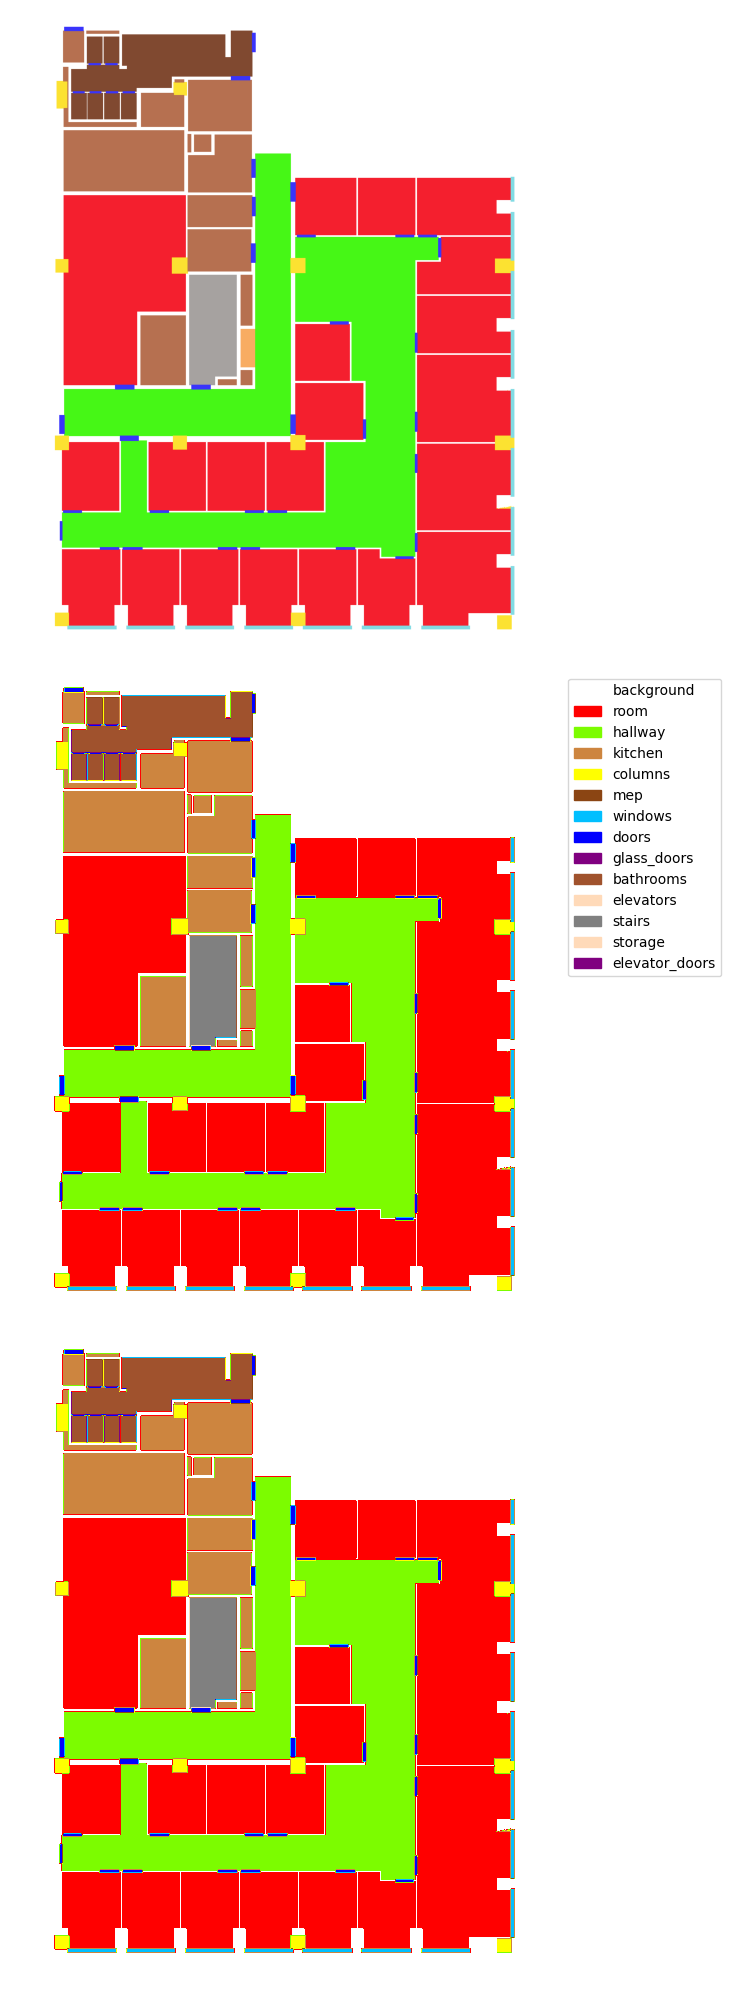

In [96]:
mask_file='47.png'
mask_org = cv2.imread(mask_folder+'/'+mask_file)
mask_org = cv2.cvtColor(mask_org, cv2.COLOR_BGR2RGB)

mask_png = cv2.imread(mask_folder+'Category/'+mask_file,cv2.IMREAD_GRAYSCALE)
mask_png = np.round(mask_png.astype(np.float32)*Number_Category/ 255.0,0).astype(np.uint8)


file_npz, extension = os.path.splitext(mask_file)
mask_npz = np.load(mask_folder+'/Category/'+file_npz+'.npz')['data']
print(np.unique(mask_png),np.unique(mask_npz))

fig, axs = plt.subplots(3, 1, figsize=(20, 20))
im1 = axs[0].imshow(mask_org, cmap='rainbow')
axs[0].axis('off')
im2 = axs[1].imshow(mask_png, cmap=cmap,norm=norm)
axs[1].axis('off')
im3 = axs[2].imshow(mask_npz, cmap=cmap,norm=norm)
axs[2].axis('off')


# Create a custom legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(category_colors, labels)]
axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.05, 1))



plt.tight_layout()
plt.show()